# CITS5508 Machine Learning

## Theo Andily  [22764884]

This lab illustrates the use of the scikit library in python to perform Machine Learning using the **Support Vector Machine Classifier**. The lab uses data from the Forrest type mapping dataset provided on the UCI ML website and has been modifief for the purpose of the lab. Both data set has been stored as a csv file named *training.csv* and *testing.csv* which includes the multivariate remote sensing data of some forrest areas in Japan.

## Python Setup


In [55]:
# Imports
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
def load_data(filename):
    """ Load training from csv file into a panda dataframe"""
    return pd.read_csv(filename)

In [57]:
train = load_data('training.csv')
test = load_data('testing.csv')

In [58]:
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [59]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


Most of these data are numerical other than the **class** columns which holds either characters **d**, **h**, **s** or **o** . This holds true for both training and testing data. In the columns with pred_minus_obs_H prepended the value ranges go from positive to negative.

In [60]:
train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


In [61]:
test.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

There are 325 instances in the testing data and 198 instances in the training data. All the values are non-null which means there are no missing data. The data provided is a total of 525 data instances and given the modifications 62% are for training the model while 38% are for testing the model.

## Data Visualisation

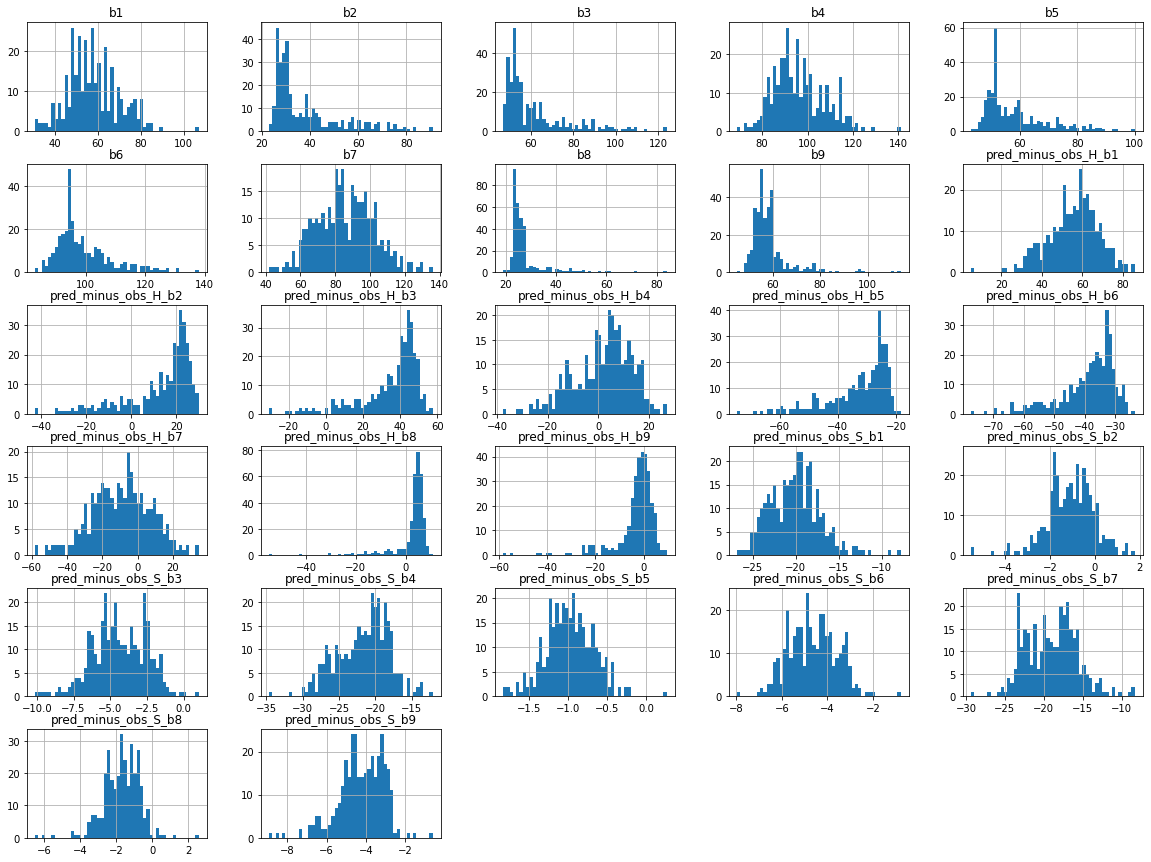

In [64]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()

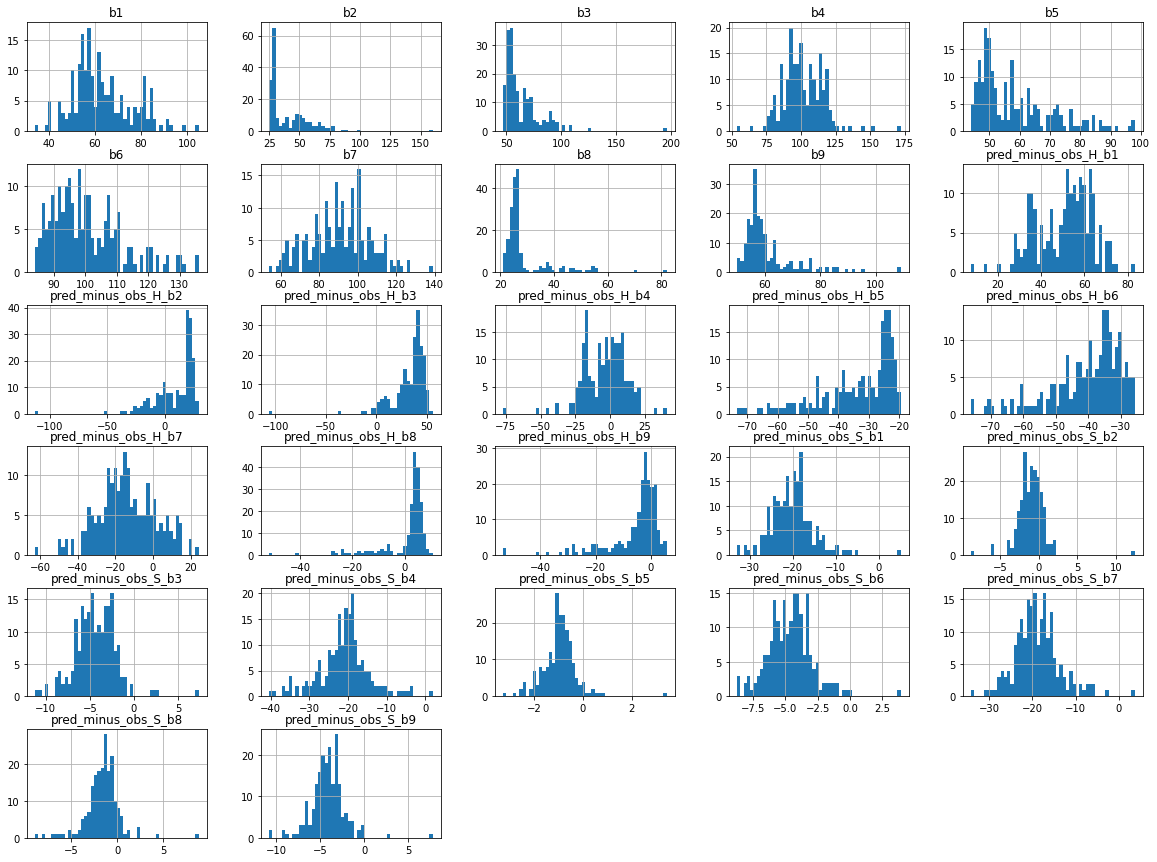

In [65]:
%matplotlib inline
test.hist(bins=50, figsize=(20,15))
plt.show()

There are observable pattern shown in both data set and they seem similar from the histogram plots. Further searching for a pattern into each columns shows a distinct style of graphs. Column b1, b4, b7 shows a plots closely following a normal distribution patterns where as colun b2, b3, b5, b6, b8 and b9 shows a right skewed patterns which indicates the mean, mode and median are all different. Each colum also has a different range of value and especially the pred columns goes towards negative value.

# Data Transformation

In [66]:
# Remove the pred data as per required
def remove_pred_data(df):
    """ Removal of columns with prepended 'pred_mins_obs' """
    for columns in df:
        if 'pred' in columns:
            del df[columns]

remove_pred_data(train)
remove_pred_data(test)

In [67]:
# Checking for imbalance data set in training and testing
print('CLASS |  TRAIN(%) |  TEST(%)  ')
for classes in range(len(train['class'].value_counts())):
    print(' ',train['class'].value_counts().keys()[classes],'  |  ',  round(train['class'].value_counts()[classes] / train['class'].value_counts().sum() * 100, 2),'  |  ', round(test['class'].value_counts()[classes] / test['class'].value_counts().sum() * 100, 2))

CLASS |  TRAIN(%) |  TEST(%)  
  s   |   41.85   |   29.8
  d   |   32.31   |   27.27
  o   |   14.15   |   24.24
  h   |   11.69   |   18.69


There is a large distiction between in clasess **s** and **d** compared to other classed in the data set and this will induce more misclassification when performing the svm classification. SVM works by creating a hyperplane between clusters of classes and it uses certain points known as support vectors to set the margin between the hyperplane and the point. Then the margin tends to favour the majority class on imbalance datasets but there are some parameters in the svc.SVM class that can reduce the impact of imbalance classification which is the **class_weight**.

## Custom Pipelines

In [68]:
# Imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [69]:
# Create a class to select numerical or categorical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [70]:
numerical_attribs = list(train.drop("class", axis=1))

numerical_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_attribs)),             # Choosing the numerical columns
    ('imputer', SimpleImputer(strategy="median")),                  # Just in case of missing data
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numerical_attribs),
])

train_transformed = full_pipeline.fit_transform(train)
test_transformed = full_pipeline.fit_transform(test)
train_transformed

array([[ 0.76823994,  0.86623295,  0.43606029, ...,  3.01708854,
         0.48758236,  0.91533208],
       [ 0.76823994, -0.71267251, -0.69876454, ..., -0.23256801,
        -0.1850164 ,  0.01352708],
       [ 0.42598088, -0.84996863, -0.76551894, ..., -0.29274684,
        -0.1850164 , -0.21192418],
       ...,
       [-0.7719258 , -0.84996863, -0.89902774, ..., -1.43614451,
        -0.72309541, -0.66282668],
       [-0.25853722, -0.84996863, -0.63201013, ..., -1.25560804,
        -0.58857565, -0.3246498 ],
       [ 1.11049899, -0.71267251, -0.69876454, ...,  0.36922024,
        -0.31953615, -0.09919855]])

Since the data set includes both categorical and numerical attributes, the data will need to be separated before performing any model fitting for regression. To simplify the process the data are processed through a pipeline which works by processing the data in an orderly manner based on the given set of instructions. In the case of the numerical data, the data are first selected, then placed through a scikit **Imputer** to check for missing data and lastly scaled each feature using the scikit **StandardScaler** library.

# Data Modelling

## Support Vector Classification

In [71]:
# Import
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [72]:
train_labels = train[['class']].values.ravel()
train_cw = {}
for classes in range(len(train['class'].value_counts())):
    train_cw[train['class'].value_counts().keys()[classes]] = train['class'].value_counts()[classes]

# The hyperparameters variables is the C and kernel
clfSVM = GridSearchCV(SVC(gamma='auto',decision_function_shape='ovo',class_weight=train_cw), {
    'C': [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],

}, cv=3, return_train_score=False, scoring='accuracy')
clfSVM.fit(train_transformed[:, :-1], train_labels)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={'d': 105, 'h': 38, 'o': 46, 's': 136},
                           decision_function_shape='ovo', gamma='auto'),
             param_grid={'C': [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [73]:
svm = pd.DataFrame(clfSVM.cv_results_)
svm = svm.sort_values('mean_test_score', ascending=False)[['param_C', 'param_kernel', 'mean_test_score']]

In [74]:
print('Best Parameters for Support Vector Machine:' + '\n', 'kernel:', clfSVM.best_params_['kernel'], '\n', '     C:', clfSVM.best_params_['C'])

Best Parameters for Support Vector Machine:
 kernel: linear 
      C: 1


## Stochatic Gradient Descent Classification

In [75]:
# The hyperparameters variables is the loss and eta0
clfSGD = GridSearchCV(SGDClassifier(learning_rate='optimal', random_state=0, class_weight=train_cw), {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'eta0': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

}, cv=3, return_train_score=False, scoring='accuracy')

clfSGD.fit(train_transformed[:, :-1], train_labels)

GridSearchCV(cv=3,
             estimator=SGDClassifier(class_weight={'d': 105, 'h': 38, 'o': 46,
                                                   's': 136},
                                     random_state=0),
             param_grid={'eta0': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                  1.0],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             scoring='accuracy')

In [76]:
SGD = pd.DataFrame(clfSGD.cv_results_)
SGD = SGD.sort_values('mean_test_score', ascending=False)[['param_eta0', 'param_loss', 'mean_test_score']]

In [77]:
print('Best Parameters for stochastic Gradient Descent:' + '\n', 'eta0:', clfSGD.best_params_['eta0'], '\n', 'loss:', clfSGD.best_params_['loss'])

Best Parameters for stochastic Gradient Descent:
 eta0: 0.1 
 loss: perceptron


In the modelling section there are two machine learning models made to fit the training data and tested. The first model is a Support Vector Classification model which places the data on a plane and seperates them based on the hyperplane. The hyperplanes are created based on the given kernel which in this case are radial basis function(rbf), linear, polynomial(poly) and sigmoid.

The other variables is the regularization parameter also called *C* in scikit-learn, generally a low *C* value has a big margin and high C value has a lower margin. SVMs pose a quadratic optimisation issue in which the goal is to maximise the margin between the two classes while reducing the number of misclassifications. However, in order to identify a solution for non-separable problems, the misclassification constraint must be eased, which is done by setting the previously described "regularisation". So, intuitively, the greater lambda becomes, the fewer incorrectly classified examples are allowed (or the highest the price the pay in the loss function). Therefore, the more misclassification are permitted as the *C* values goes to 0 (without being 0) and as *C* goes larger the margin tends towards the hard-margin with non-misclassification.

For the stochastic gradient descent, the independent variables are the eta0 and loss. To optimised those parameters the experiment is ran multiple times using grid search with 3 fold cross validation indicated by cv=3. After running the optimization, the best parameters given in SVM is with kernel as linear and C as 10. The best parameters for stochastic gradient descent was with loss as hinge and eta0 as 0.1. These function ran very quick as the data is only in the hundreds region but it will exponentially grow and it would be much longer on a scale of millions.


To always give the same best parameters for stochastic gradient descent, I included random_state=0 which removes the randomness in gradient descent.

# Data Prediction

In [78]:
# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [79]:
test_labels = test[['class']].values.ravel()
support_vector_model_pred = clfSVM.predict(test_transformed[:, :-1])

In [80]:
stochastic_gradient_descent_pred = clfSGD.predict(test_transformed[:, :-1])

In [81]:
support_vector_model_CM = confusion_matrix(test_labels, support_vector_model_pred)

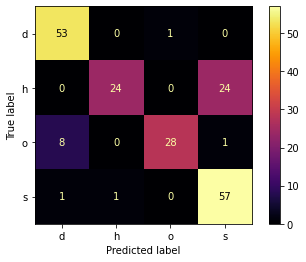

In [82]:
disp_CM1 = ConfusionMatrixDisplay(confusion_matrix=support_vector_model_CM, display_labels=clfSVM.classes_)
disp_CM1.plot(cmap='inferno')
plt.show()

In [83]:
stochastic_gradient_descent_CM = confusion_matrix(test_labels, stochastic_gradient_descent_pred)

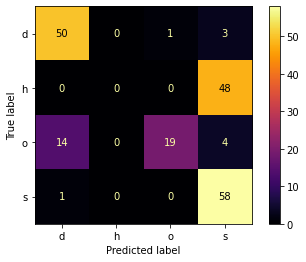

In [84]:
display_CM2 = ConfusionMatrixDisplay(confusion_matrix=stochastic_gradient_descent_CM, display_labels=clfSGD.classes_)
display_CM2.plot(cmap='inferno')
plt.show()

In [85]:
SVM_accuracy = svm.sort_values('mean_test_score', ascending=False)[['mean_test_score']].iloc[0].astype(float)
print(SVM_accuracy)
print('The accuracy for the Support Vector Model is 0.858506')

mean_test_score    0.858506
Name: 1, dtype: float64
The accuracy for the Support Vector Model is 0.858506


In [86]:
SGDC_accuracy = SGD.sort_values('mean_test_score', ascending=False)[['mean_test_score']].iloc[0]
print(SGDC_accuracy)
print('The accuracy for the Stochastic Gradient Descent Model is 0.839959.')

mean_test_score    0.744592
Name: 12, dtype: float64
The accuracy for the Stochastic Gradient Descent Model is 0.839959.


Comparing both confusion matrix there are major similarities in their error rate as well as success rate. There are a lot of errors in both model when it comes to predicting the **h** class based on the given data set while the rest of the classes have very low errors. In terms of the accuracy, the support vector model with linear kernel and C value of 10 gave a higher accuracy compared to the stochastic gradient descent model.